In [ ]:
# 2017_05: practice for SETI IBM ML Challenge
# Generate 3D plot of Candidate signals in sky
import requests

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Limiting number of rows to be < 2000 since that is the max output of 'requests.get',
# so reading data in 2 steps. Step1: RA = 0-10 Hr
params = {
    'ramin':0, 'ramax':10, 'decmin':-90, 'decmax':90, 'limit':2000
}
r = requests.get('https://setigopublic.mybluemix.net/v1/coordinates/aca',
  params = params)

r.raise_for_status()

import json
print r.json()['total_num_rows']

1919


In [4]:
# Extract the first half of the values from SignalDB header
cnt1 = r.json()['total_num_rows']
x1 = np.linspace(0, 1, cnt1, dtype=float)
y1 = np.linspace(0, 1, cnt1, dtype=float)
z1 = np.linspace(0, 1, cnt1, dtype=float)
for i in range(cnt1):
    x1[i] = r.json()['rows'][i]['ra2000hr']
    y1[i] = r.json()['rows'][i]['dec2000deg']
    z1[i] = r.json()['rows'][i]['number_of_candidates']
print cnt1

1919


In [5]:
k = 1 #Arbitrary radius
# Initialize arrays
ra1 = np.linspace(0, 1, cnt1, dtype=float)
dec1 = np.linspace(0, 1, cnt1, dtype=float)
t = np.linspace(0, 1, cnt1, dtype=float)
x1_3d = np.linspace(0, 1, cnt1, dtype=float)
y1_3d = np.linspace(0, 1, cnt1, dtype=float)
z1_3d = np.linspace(0, 1, cnt1, dtype=float)

ra1 = np.multiply(x1,2*np.pi/24) #Convert RA's HH:MM:SS to Radians
dec1 = np.multiply(y1,2*np.pi/360) #Convert RA's HH:MM:SS to Radians

# Calculate projections of vector on x,y,z axis
t = np.multiply(k,np.cos(dec1)) 
x1_3d = np.multiply(t,np.cos(ra1))
y1_3d = np.multiply(k,np.sin(dec1))
z1_3d = np.multiply(t,np.sin(ra1))

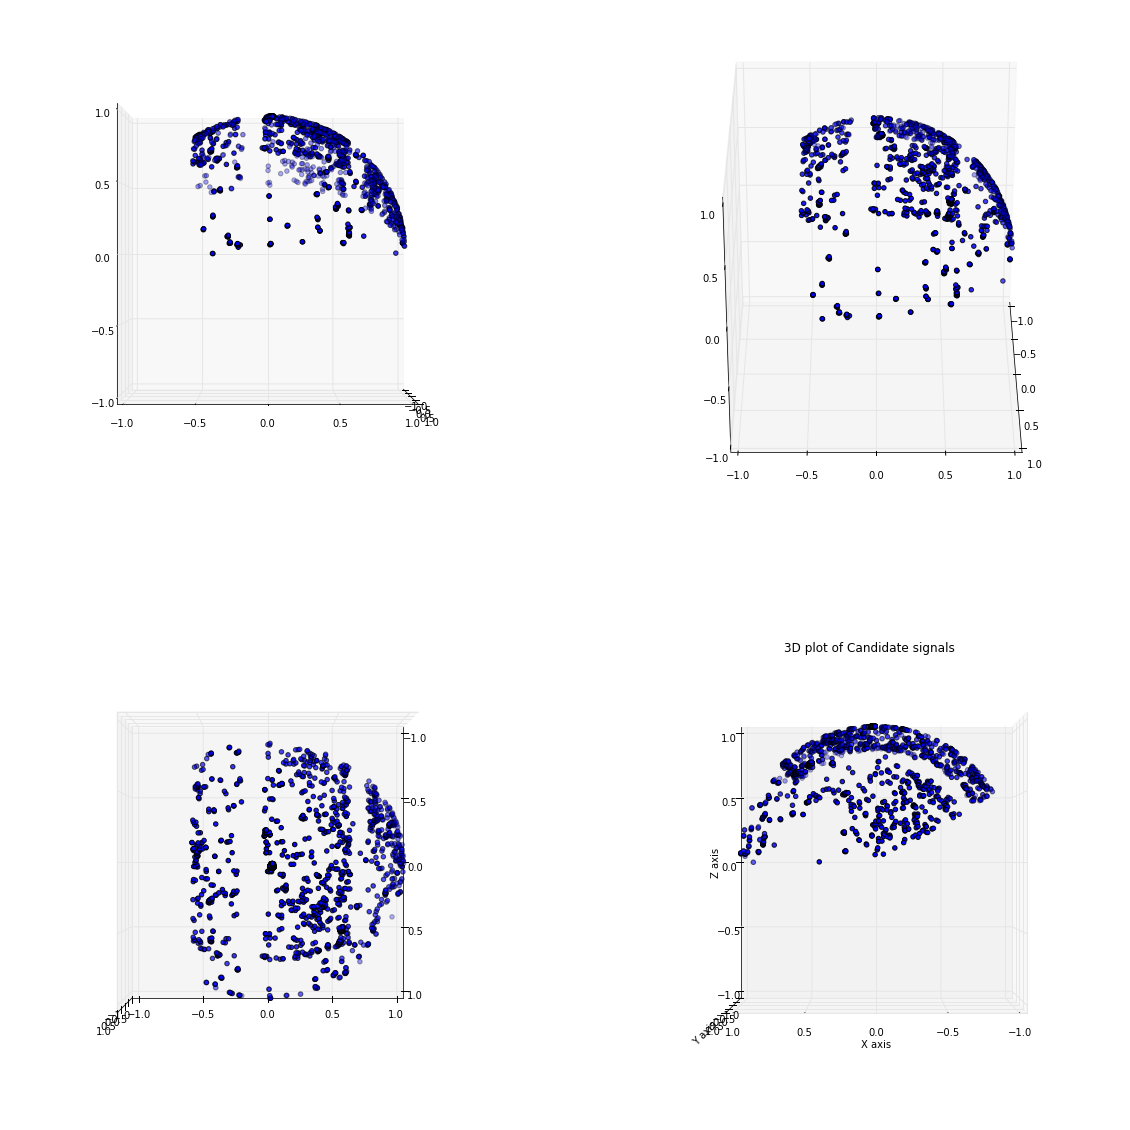

In [6]:
# Create 4 by 4 plot to visualize Step1
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(x1_3d, y1_3d, z1_3d)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.view_init(0, 0)
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(x1_3d, y1_3d, z1_3d)
ax.set_xlim(-1.01, 1.01)
ax.set_ylim(-1.01, 1.01)
ax.set_zlim(-1.01, 1.01)
ax.view_init(30, 0)
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(x1_3d, y1_3d, z1_3d)
ax.set_xlim(-1.01, 1.01)
ax.set_ylim(-1.01, 1.01)
ax.set_zlim(-1.01, 1.01)
ax.view_init(90, 0)
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(x1_3d, y1_3d, z1_3d)
ax.set_xlim(-1.01, 1.01)
ax.set_ylim(-1.01, 1.01)
ax.set_zlim(-1.01, 1.01)
ax.view_init(0, 90)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D plot of Candidate signals')

In [7]:
# Extract remaining values from SignalDB header
# Step2: RA = 10-24 Hr
params = {
    'ramin':10, 'ramax':24, 'decmin':-90, 'decmax':90, 'limit':2000
}
r = requests.get('https://setigopublic.mybluemix.net/v1/coordinates/aca',
  params = params)

r.raise_for_status()

import json
print r.json()['total_num_rows']

1850


In [8]:
# Extract the second half of the values from SignalDB header
cnt2 = r.json()['total_num_rows']
x2 = np.linspace(0, 1, cnt2, dtype=float)
y2 = np.linspace(0, 1, cnt2, dtype=float)
z2 = np.linspace(0, 1, cnt2, dtype=float)
for i in range(cnt2):
    x2[i] = r.json()['rows'][i]['ra2000hr']
    y2[i] = r.json()['rows'][i]['dec2000deg']
    z2[i] = r.json()['rows'][i]['number_of_candidates']
print cnt2

1850


In [9]:
# Initialize arrays
ra2 = np.linspace(0, 1, cnt2, dtype=float)
dec2 = np.linspace(0, 1, cnt2, dtype=float)
t2 = np.linspace(0, 1, cnt2, dtype=float)
x2_3d = np.linspace(0, 1, cnt2, dtype=float)
y2_3d = np.linspace(0, 1, cnt2, dtype=float)
z2_3d = np.linspace(0, 1, cnt2, dtype=float)

ra2 = np.multiply(x2,2*np.pi/24) #Convert RA's HH:MM:SS to Radians
dec2 = np.multiply(y2,2*np.pi/360) #Convert RA's HH:MM:SS to Radians

# Calculate projections of vector on x,y,z axis
t2 = np.multiply(k,np.cos(dec2))
x2_3d = np.multiply(t2,np.cos(ra2))
y2_3d = np.multiply(k,np.sin(dec2))
z2_3d = np.multiply(t2,np.sin(ra2))
    
# Join the two data sets
x_3d = np.concatenate((x1_3d, x2_3d))
y_3d = np.concatenate((y1_3d, y2_3d))
z_3d = np.concatenate((z1_3d, z2_3d))

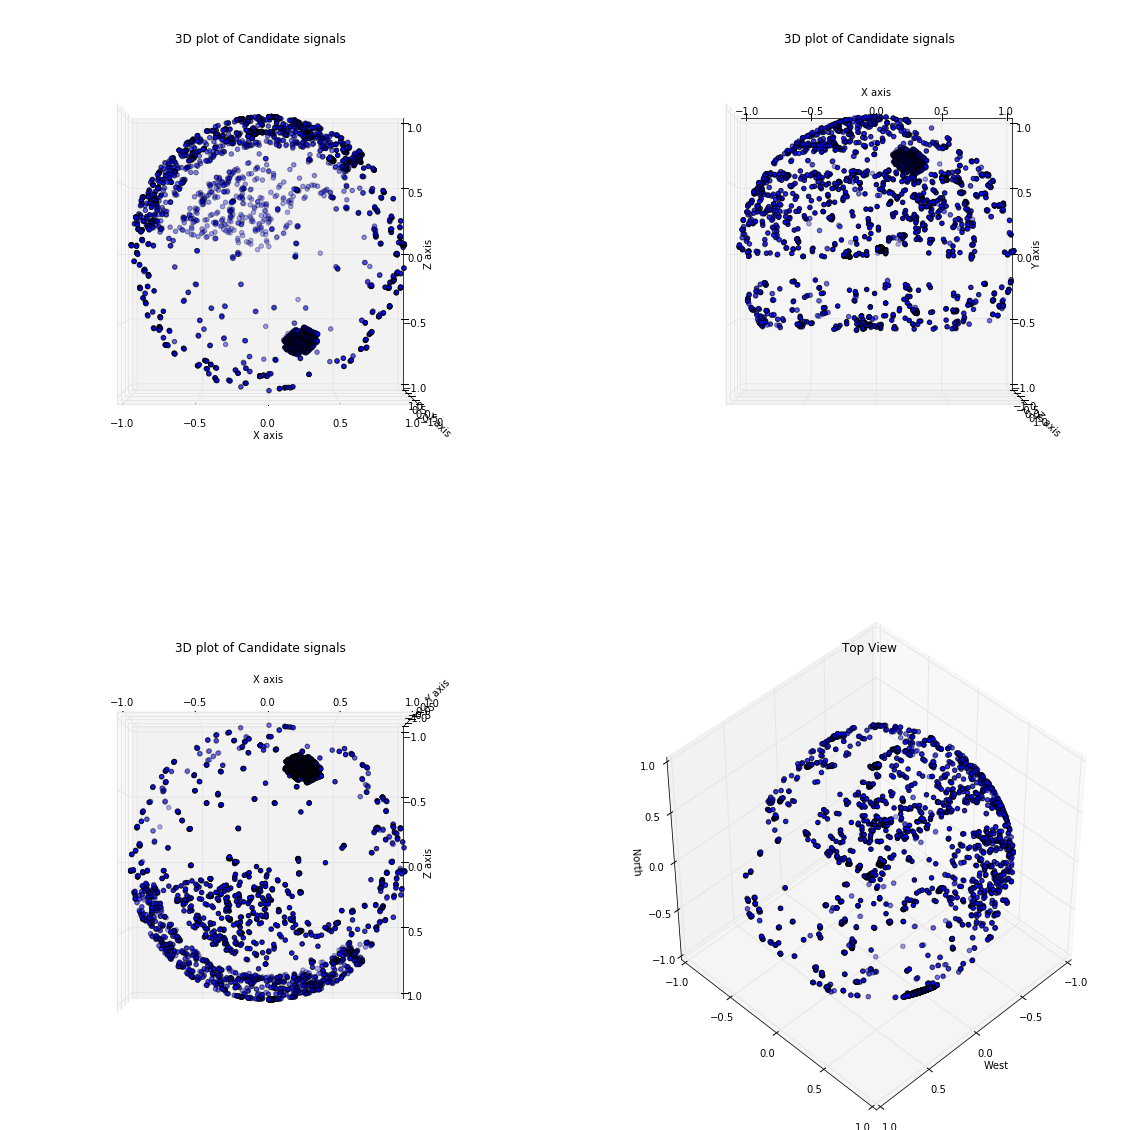

In [10]:
# Create 4 by 4 plot to visualize Step1 + Step2 data
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(x_3d, y_3d, z_3d)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D plot of Candidate signals')
ax.view_init(0, 270)
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(x_3d, y_3d, z_3d)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D plot of Candidate signals')
ax.view_init(90, 270)
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(x_3d, y_3d, z_3d)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D plot of Candidate signals')
ax.view_init(180, 270)
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(x_3d, y_3d, z_3d)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('West')
#ax.set_ylabel('Y axis')
ax.set_zlabel('North')
plt.title('Top View')
ax.view_init(45,45)


In [11]:
# Rotate all data points by 90 Deg to get the correct orientation
# Initialize new variables
x_3dd = np.linspace(0, 1, cnt1+cnt2, dtype=float)
y_3dd = np.linspace(0, 1, cnt1+cnt2, dtype=float)
z_3dd = np.linspace(0, 1, cnt1+cnt2, dtype=float)

# 3D vector rotation
for ii in range(1,cnt1+cnt2):
    tempx = x_3d[ii]
    tempy = y_3d[ii]
    tempz = z_3d[ii]
    x_3dd[ii]=tempx
    y_3dd[ii]=-tempz
    z_3dd[ii]=tempy

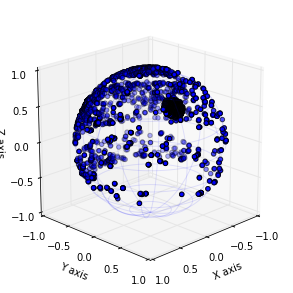

In [14]:
# Overlaying Wireframe of Sky over Candidate data
from mpl_toolkits.mplot3d import axes3d

# Wireframe of Sky
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# Wireframe of Sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x, y, z, rstride=10, cstride=10, color='b',alpha = 0.1)

ax.scatter(x_3dd, y_3dd, z_3dd) # Plot distribution of Candidates in the sky

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(20,45)
#plt.axis('off') # remove axes for visual appeal
plt.show()